# **Author: Niraj Kulkarni** 

## **ADVANCE LEVEL TASK** 

### **Convolutional Neural Nerwork(CNN) that can read handwriting**
### **Problem Statement: Build Neural network machine learning project with the MNIST Handwritten Digit Classification Challenge using Tensorflow and CNN.**

### **Importing the libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

### Loading the MINST dataset

In [5]:
#Here we are loading the dataset directly into the training and testing set
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


## **Feature Scaling**

### **Here we are applying feature scaling to our data so that all the values either 1, 0**

In [6]:
x_train = x_train/255
x_test = x_test/255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
x_train.shape

(60000, 28, 28)

### As we can see it is a 2d array of 28 rows and columns

## **Now we will convert the 2d array in 1d array**

In [9]:
X_train = x_train.reshape(len(x_train), 28*28)
X_test = x_test.reshape(len(x_test), 28*28)

## **Building the Convolutional Neural Network(CNN)**

In [10]:
#Initializing the model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [11]:
#Compiling the Model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Training our model, here we will train it upto 30 epochs
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9225
Epoch 2/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1255 - accuracy: 0.9642
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0877 - accuracy: 0.9739
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9798
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0544 - accuracy: 0.9833
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0427 - accuracy: 0.9864
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0359 - accuracy: 0.9892
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.020

### Evaluating our model score on test data

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1415 - accuracy: 0.9772


[0.14145569503307343, 0.9771999716758728]

### **As we can see above the model accuracy is 97 percent**

### Now we will predict our test results

In [14]:
predictions = model.predict(X_test)

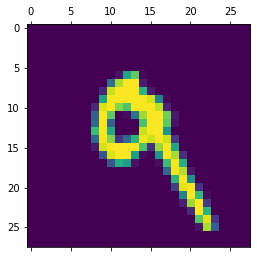

In [15]:
#PREDICTION 1
plt.matshow(x_test[7])

In [16]:
predictions[7]

array([3.4974566e-17, 8.3267560e-12, 2.5435099e-06, 4.8699039e-01,
       2.2533238e-03, 1.1025369e-03, 9.9578220e-16, 3.8943762e-07,
       7.9459453e-05, 9.9999940e-01], dtype=float32)

### **The model is returning the array of the predicted data, the element with the highest index in the array is our answer.**

In [17]:
#Using the argmax argument
np.argmax(predictions[7])

9

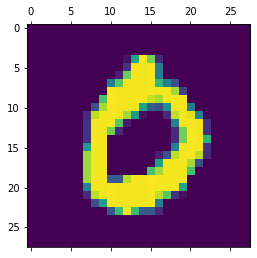

In [23]:
#PREDICTION 2
plt.matshow(x_test[3])

In [24]:
np.argmax(predictions[3])

0

## **As we can see our model is able to identify the handwritten data !!**

### **Creating the confusion matrix**

In [18]:
pred_labels = [np.argmax(i) for i in predictions]
matrix = tf.math.confusion_matrix(labels=y_test, predictions=pred_labels)
matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    0,    2,    2,    4,    2,    2,    1],
       [   0, 1126,    2,    1,    0,    0,    2,    1,    3,    0],
       [   4,    3, 1000,    2,    4,    0,    2,    2,   15,    0],
       [   0,    0,    4,  987,    0,    3,    0,    2,   10,    4],
       [   1,    1,    2,    0,  961,    0,    4,    1,    2,   10],
       [   2,    0,    0,   18,    2,  860,    1,    1,    7,    1],
       [   2,    3,    3,    1,    7,    5,  934,    0,    3,    0],
       [   0,    6,    9,    6,    0,    1,    0,  994,    4,    8],
       [   0,    0,    2,    3,    4,    0,    0,    2,  959,    4],
       [   2,    2,    0,    4,    8,    8,    0,    4,    7,  974]])>

### This is our confusion matrix, now let us visualize it graphically.

Text(69.0, 0.5, 'Actual Values')

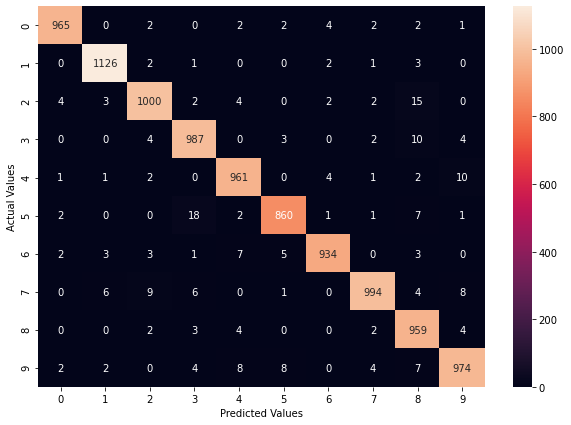

In [21]:
#Graphical representation of the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, fmt='d')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
#plt.show()

## **Conclusion:- Thus, we are able to predict handwritten data from the MNIST data set using our CNN Model.**

# *THANKYOU*